In [66]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys

repo_dir = os.path.abspath(os.path.join('..'))
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

results_dir = Path(repo_dir) / 'experiments' / 'results'
results_dir.mkdir(exist_ok=True)

In [78]:
scale = 4
test_set = 'Set14'
time = []
psnr = []
model = []
for save_dir in sorted(Path('.').glob(f'*-sc{scale}')):
    print(save_dir)
#     if 'bicubic' not in save_dir.stem:
    model += [save_dir.stem.rsplit('-', 1)[0].upper()]
    metrics_file = save_dir / f'test/{test_set}/metrics.csv'
    metrics = pd.read_csv(str(metrics_file), index_col='name')
    time += [metrics.time.average]
    psnr += [metrics.psnr.average]


bicubic-sc4
espcn-sc4
hevc-sc4
srcnn-9-1-5-sc4
srcnn-9-5-5-sc4


In [79]:
model

['BICUBIC', 'ESPCN', 'HEVC', 'SRCNN-9-1-5', 'SRCNN-9-5-5']

In [80]:
psnr

[22.054152216230122,
 25.400130680629182,
 19.813202585492814,
 25.314588138035365,
 25.61502892630441]

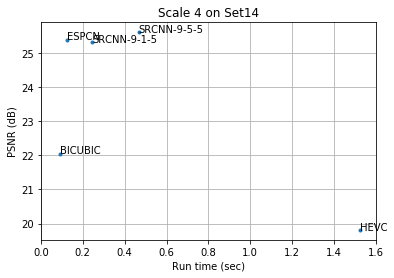

In [75]:
plt.figure()
plt.plot(time, psnr, '.')
# plt.semilogx(time, psnr, '.')
plt.grid(True, which='both')
for x, y, s in zip(time, psnr, model):
    plt.text(x, y, s)

plt.xlim((0, 1.6))
# plt.xticks(np.arange(0, 0.6, 0.1))
plt.xlabel('Run time (sec)')
plt.ylabel('PSNR (dB)')
plt.title(f'Scale {scale} on {test_set}')

plt.savefig(str(results_dir / f'performance-sc{scale}-{test_set}.png'))
# plt.close()


In [ ]:


# Performance plot
for scale in [3, 4]:
    for test_set in ['Set5', 'Set14']:
        time = []
        psnr = []
        model = []
        for save_dir in sorted(Path('.').glob(f'*-sc{scale}')):
            if 'bicubic' not in save_dir.stem:
                model += [save_dir.stem.rsplit('-', 1)[0].upper()]
                metrics_file = save_dir / f'test/{test_set}/metrics.csv'
                metrics = pd.read_csv(str(metrics_file), index_col='name')
                time += [metrics.time.average]
                psnr += [metrics.psnr.average]
        plt.figure()
        plt.semilogx(time, psnr, '.')
        plt.grid(True, which='both')
        for x, y, s in zip(time, psnr, model):
            if 'NS' in s:
                s = s.split('-')[1]
            plt.text(x, y, s)
        plt.xlabel('Run time (sec)')
        plt.ylabel('PSNR (dB)')
        plt.title(f'Scale {scale} on {test_set}')
        plt.savefig(str(results_dir / f'performance-sc{scale}-{test_set}.png'))
        plt.close()


In [ ]:

# History plot
for scale in [3, 4]:
    plt.figure()
    for save_dir in sorted(Path('.').glob(f'*-sc{scale}')):
        if 'bicubic' not in save_dir.stem:
            model = save_dir.stem.rsplit('-', 1)[0].upper()
            history_file = save_dir / f'train/history.csv'
            history = pd.read_csv(str(history_file))
            plt.plot(history.epoch, history.val_psnr, label=model, alpha=0.8)
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Average test PSNR (dB)')
    plt.savefig(str(results_dir / f'history-sc{scale}.png'))
    plt.xlim(0, 500)
    if scale == 3:
        plt.ylim(31.5, 34.5)
    if scale == 4:
        plt.ylim(29, 32)
    plt.savefig(str(results_dir / f'history-sc{scale}-zoom.png'))
    plt.close()
